In [1]:
from sklearn.model_selection import train_test_split, KFold
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import tensorflow.keras
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [3]:
folder = '/kaggle/input/fashion-mnist-itba-lab-2020/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [4]:
# # x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)
# kf = KFold(n_splits=2,random_state=41, shuffle=True)
# for j, train_test in enumerate(kf.split(x, y)):
#     display(j)
#     train_index, test_index = train_test
#     display(train_test)
#     x_train, x_valid = x[train_index], x[test_index]
#     y_train, y_valid = y[train_index], y[test_index]

In [5]:
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_valid)

In [6]:
# alto = 4
# ancho = 8
# f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
# axs = axs.reshape(-1)
# for i in range(alto*ancho):
#     axs[i].imshow(x_train[i], cmap='gray')
#     axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
#     axs[i].axis('off')

In [7]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# x_train = scaler.fit_transform(x_train.reshape(x_train.shape[0], -1)).reshape(x_train.shape)
# x_valid = scaler.transform(x_valid.reshape(x_valid.shape[0], -1)).reshape(x_valid.shape)

In [8]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=(28,28)))
# model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(output_size*10, name='Salida_1',activation='sigmoid'))
model_single_layer.add(Dropout(.3))
model_single_layer.add(Dense(output_size, name='Salida_2'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Salida_1 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Salida_2 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
lr = 0.01
# opt = optimizers.sgd(lr=lr)
opt = optimizers.Adam(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)
kf = KFold(n_splits=20,shuffle=True)
batch_size = 2048
callback = EarlyStopping(monitor='loss', patience=3)
for j, train_test in enumerate(kf.split(x, y)):
    display(j)
    train_index, test_index = train_test
    display(train_test)
    x_train, x_valid = x[train_index], x[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    y_train_categorical = to_categorical(y_train)
    y_val_categorical = to_categorical(y_valid)
    scaler = MinMaxScaler(feature_range=(0,1))
    x_train = scaler.fit_transform(x_train.reshape(x_train.shape[0], -1)).reshape(x_train.shape)
    x_valid = scaler.transform(x_valid.reshape(x_valid.shape[0], -1)).reshape(x_valid.shape)
    model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=64, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical),
                       callbacks=[callback]
                      )

0

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   14,    19,    31, ..., 59944, 59967, 59988]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 1s 20us/step - loss: 1.1016 - accuracy: 0.6143 - val_loss: 0.6275 - val_accuracy: 0.7743
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.5844 - accuracy: 0.7903 - val_loss: 0.4973 - val_accuracy: 0.8193
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.4967 - accuracy: 0.8214 - val_loss: 0.4487 - val_accuracy: 0.8350
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.4569 - accuracy: 0.8380 - val_loss: 0.4164 - val_accuracy: 0.8470
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.4353 - accuracy: 0.8429 - val_loss: 0.4015 - val_accuracy: 0.8543
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.4143 - accuracy: 0.8524 - val_loss: 0.3803 - val_accuracy: 0.8657
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - lo

1

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([    9,    27,    28, ..., 59924, 59942, 59959]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.2309 - accuracy: 0.9146 - val_loss: 0.1882 - val_accuracy: 0.9317
Epoch 2/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.2311 - accuracy: 0.9142 - val_loss: 0.1914 - val_accuracy: 0.9273
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2282 - accuracy: 0.9149 - val_loss: 0.1884 - val_accuracy: 0.9290
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2258 - accuracy: 0.9168 - val_loss: 0.1913 - val_accuracy: 0.9290
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2201 - accuracy: 0.9182 - val_loss: 0.1947 - val_accuracy: 0.9277
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2219 - accuracy: 0.9176 - val_loss: 0.1971 - val_accuracy: 0.9283
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

2

(array([    0,     1,     2, ..., 59995, 59996, 59997]),
 array([    5,    12,    71, ..., 59993, 59998, 59999]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 7us/step - loss: 0.2186 - accuracy: 0.9189 - val_loss: 0.1717 - val_accuracy: 0.9280
Epoch 2/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.2162 - accuracy: 0.9191 - val_loss: 0.1642 - val_accuracy: 0.9363
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2136 - accuracy: 0.9203 - val_loss: 0.1627 - val_accuracy: 0.9387
Epoch 4/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.2111 - accuracy: 0.9213 - val_loss: 0.1682 - val_accuracy: 0.9303
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2063 - accuracy: 0.9226 - val_loss: 0.1768 - val_accuracy: 0.9313
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2063 - accuracy: 0.9225 - val_loss: 0.1723 - val_accuracy: 0.9343
Epoch 7/64
57000/57000 [==============================] - 0s 6us/step - los

3

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   20,    22,    26, ..., 59940, 59941, 59978]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2082 - accuracy: 0.9203 - val_loss: 0.1571 - val_accuracy: 0.9427
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2103 - accuracy: 0.9203 - val_loss: 0.1555 - val_accuracy: 0.9433
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2056 - accuracy: 0.9215 - val_loss: 0.1691 - val_accuracy: 0.9383
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2048 - accuracy: 0.9228 - val_loss: 0.1604 - val_accuracy: 0.9413
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2073 - accuracy: 0.9231 - val_loss: 0.1644 - val_accuracy: 0.9383
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1970 - accuracy: 0.9270 - val_loss: 0.1648 - val_accuracy: 0.9377
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

4

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   18,    60,    91, ..., 59947, 59951, 59970]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 7us/step - loss: 0.2051 - accuracy: 0.9229 - val_loss: 0.1428 - val_accuracy: 0.9477
Epoch 2/64
57000/57000 [==============================] - 0s 7us/step - loss: 0.2051 - accuracy: 0.9231 - val_loss: 0.1452 - val_accuracy: 0.9460
Epoch 3/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1985 - accuracy: 0.9253 - val_loss: 0.1481 - val_accuracy: 0.9440
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2001 - accuracy: 0.9251 - val_loss: 0.1573 - val_accuracy: 0.9387
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2012 - accuracy: 0.9256 - val_loss: 0.1568 - val_accuracy: 0.9410
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2015 - accuracy: 0.9242 - val_loss: 0.1571 - val_accuracy: 0.9420


5

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   57,    95,   132, ..., 59971, 59984, 59995]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2007 - accuracy: 0.9247 - val_loss: 0.1538 - val_accuracy: 0.9417
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.2003 - accuracy: 0.9239 - val_loss: 0.1599 - val_accuracy: 0.9427
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1997 - accuracy: 0.9242 - val_loss: 0.1741 - val_accuracy: 0.9353
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1943 - accuracy: 0.9259 - val_loss: 0.1646 - val_accuracy: 0.9363
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1906 - accuracy: 0.9298 - val_loss: 0.1624 - val_accuracy: 0.9370
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1854 - accuracy: 0.9294 - val_loss: 0.1617 - val_accuracy: 0.9367
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

6

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([    4,    37,    83, ..., 59897, 59905, 59990]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1921 - accuracy: 0.9283 - val_loss: 0.1484 - val_accuracy: 0.9390
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1895 - accuracy: 0.9292 - val_loss: 0.1406 - val_accuracy: 0.9490
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1906 - accuracy: 0.9291 - val_loss: 0.1473 - val_accuracy: 0.9427
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1877 - accuracy: 0.9292 - val_loss: 0.1497 - val_accuracy: 0.9427
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1884 - accuracy: 0.9286 - val_loss: 0.1561 - val_accuracy: 0.9343
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1882 - accuracy: 0.9296 - val_loss: 0.1464 - val_accuracy: 0.9480
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

7

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   16,    23,   103, ..., 59898, 59904, 59986]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1837 - accuracy: 0.9308 - val_loss: 0.1434 - val_accuracy: 0.9513
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1789 - accuracy: 0.9317 - val_loss: 0.1354 - val_accuracy: 0.9557
Epoch 3/64
57000/57000 [==============================] - 0s 7us/step - loss: 0.1819 - accuracy: 0.9305 - val_loss: 0.1436 - val_accuracy: 0.9507
Epoch 4/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1791 - accuracy: 0.9318 - val_loss: 0.1496 - val_accuracy: 0.9480
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1761 - accuracy: 0.9325 - val_loss: 0.1454 - val_accuracy: 0.9470
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1749 - accuracy: 0.9333 - val_loss: 0.1510 - val_accuracy: 0.9423
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

8

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   35,    58,    59, ..., 59976, 59987, 59994]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1709 - accuracy: 0.9336 - val_loss: 0.1092 - val_accuracy: 0.9640
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1687 - accuracy: 0.9352 - val_loss: 0.1137 - val_accuracy: 0.9660
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1698 - accuracy: 0.9354 - val_loss: 0.1110 - val_accuracy: 0.9607
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1647 - accuracy: 0.9372 - val_loss: 0.1226 - val_accuracy: 0.9540
Epoch 5/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1673 - accuracy: 0.9370 - val_loss: 0.1196 - val_accuracy: 0.9557
Epoch 6/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1702 - accuracy: 0.9353 - val_loss: 0.1176 - val_accuracy: 0.9577
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

9

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   15,    29,    69, ..., 59836, 59890, 59932]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1653 - accuracy: 0.9369 - val_loss: 0.0975 - val_accuracy: 0.9693
Epoch 2/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1678 - accuracy: 0.9352 - val_loss: 0.1008 - val_accuracy: 0.9643
Epoch 3/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1695 - accuracy: 0.9355 - val_loss: 0.1012 - val_accuracy: 0.9657
Epoch 4/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1614 - accuracy: 0.9381 - val_loss: 0.1022 - val_accuracy: 0.9657
Epoch 5/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1615 - accuracy: 0.9379 - val_loss: 0.1050 - val_accuracy: 0.9660
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1592 - accuracy: 0.9395 - val_loss: 0.1012 - val_accuracy: 0.9673
Epoch 7/64
57000/57000 [==============================] - 0s 6us/step - los

10

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([    8,    11,    46, ..., 59931, 59975, 59985]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1590 - accuracy: 0.9393 - val_loss: 0.1060 - val_accuracy: 0.9647
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1569 - accuracy: 0.9402 - val_loss: 0.1052 - val_accuracy: 0.9687
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1557 - accuracy: 0.9400 - val_loss: 0.1137 - val_accuracy: 0.9627
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1605 - accuracy: 0.9392 - val_loss: 0.1125 - val_accuracy: 0.9613
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1586 - accuracy: 0.9393 - val_loss: 0.1188 - val_accuracy: 0.9607
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1610 - accuracy: 0.9377 - val_loss: 0.1171 - val_accuracy: 0.9607


11

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([    3,    17,    48, ..., 59977, 59980, 59996]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 7us/step - loss: 0.1615 - accuracy: 0.9383 - val_loss: 0.1116 - val_accuracy: 0.9607
Epoch 2/64
57000/57000 [==============================] - 0s 7us/step - loss: 0.1650 - accuracy: 0.9371 - val_loss: 0.1149 - val_accuracy: 0.9560
Epoch 3/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1645 - accuracy: 0.9365 - val_loss: 0.1187 - val_accuracy: 0.9550
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1612 - accuracy: 0.9391 - val_loss: 0.1147 - val_accuracy: 0.9577
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1577 - accuracy: 0.9401 - val_loss: 0.1189 - val_accuracy: 0.9560
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1583 - accuracy: 0.9390 - val_loss: 0.1155 - val_accuracy: 0.9570
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

12

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   24,    36,    42, ..., 59963, 59968, 59973]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1546 - accuracy: 0.9406 - val_loss: 0.0973 - val_accuracy: 0.9717
Epoch 2/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1537 - accuracy: 0.9418 - val_loss: 0.0961 - val_accuracy: 0.9660
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1569 - accuracy: 0.9394 - val_loss: 0.1012 - val_accuracy: 0.9660
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1505 - accuracy: 0.9419 - val_loss: 0.1036 - val_accuracy: 0.9637
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1536 - accuracy: 0.9415 - val_loss: 0.1055 - val_accuracy: 0.9640
Epoch 6/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1575 - accuracy: 0.9394 - val_loss: 0.1063 - val_accuracy: 0.9650
Epoch 7/64
57000/57000 [==============================] - 0s 6us/step - los

13

(array([    0,     1,     3, ..., 59997, 59998, 59999]),
 array([    2,    32,   110, ..., 59887, 59930, 59992]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1515 - accuracy: 0.9428 - val_loss: 0.0874 - val_accuracy: 0.9683
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1484 - accuracy: 0.9434 - val_loss: 0.0884 - val_accuracy: 0.9677
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1507 - accuracy: 0.9431 - val_loss: 0.0962 - val_accuracy: 0.9647
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1509 - accuracy: 0.9411 - val_loss: 0.0976 - val_accuracy: 0.9650
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1498 - accuracy: 0.9429 - val_loss: 0.0961 - val_accuracy: 0.9663


14

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   38,    73,    78, ..., 59916, 59925, 59937]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1529 - accuracy: 0.9401 - val_loss: 0.1113 - val_accuracy: 0.9623
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1527 - accuracy: 0.9413 - val_loss: 0.1046 - val_accuracy: 0.9627
Epoch 3/64
57000/57000 [==============================] - 0s 4us/step - loss: 0.1489 - accuracy: 0.9432 - val_loss: 0.1170 - val_accuracy: 0.9573
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1514 - accuracy: 0.9417 - val_loss: 0.1185 - val_accuracy: 0.9597
Epoch 5/64
57000/57000 [==============================] - 0s 4us/step - loss: 0.1492 - accuracy: 0.9421 - val_loss: 0.1151 - val_accuracy: 0.9600
Epoch 6/64
57000/57000 [==============================] - 0s 4us/step - loss: 0.1456 - accuracy: 0.9439 - val_loss: 0.1106 - val_accuracy: 0.9607
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

15

(array([    0,     2,     3, ..., 59997, 59998, 59999]),
 array([    1,    21,    33, ..., 59896, 59899, 59934]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1469 - accuracy: 0.9445 - val_loss: 0.0881 - val_accuracy: 0.9657
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1471 - accuracy: 0.9432 - val_loss: 0.0923 - val_accuracy: 0.9640
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1479 - accuracy: 0.9427 - val_loss: 0.0906 - val_accuracy: 0.9667
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1465 - accuracy: 0.9449 - val_loss: 0.0957 - val_accuracy: 0.9630
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1420 - accuracy: 0.9457 - val_loss: 0.1008 - val_accuracy: 0.9650
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1504 - accuracy: 0.9424 - val_loss: 0.0974 - val_accuracy: 0.9643
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

16

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([    6,    64,    67, ..., 59928, 59957, 59979]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1457 - accuracy: 0.9439 - val_loss: 0.0978 - val_accuracy: 0.9583
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1383 - accuracy: 0.9468 - val_loss: 0.0963 - val_accuracy: 0.9637
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1372 - accuracy: 0.9477 - val_loss: 0.1010 - val_accuracy: 0.9607
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1458 - accuracy: 0.9441 - val_loss: 0.1012 - val_accuracy: 0.9607
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1412 - accuracy: 0.9465 - val_loss: 0.1060 - val_accuracy: 0.9587
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1412 - accuracy: 0.9455 - val_loss: 0.1016 - val_accuracy: 0.9607


17

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([   10,    39,    50, ..., 59966, 59969, 59974]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1409 - accuracy: 0.9452 - val_loss: 0.0808 - val_accuracy: 0.9680
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1431 - accuracy: 0.9452 - val_loss: 0.0783 - val_accuracy: 0.9720
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1415 - accuracy: 0.9470 - val_loss: 0.0808 - val_accuracy: 0.9703
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1372 - accuracy: 0.9484 - val_loss: 0.0794 - val_accuracy: 0.9717
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1410 - accuracy: 0.9461 - val_loss: 0.0788 - val_accuracy: 0.9733
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1402 - accuracy: 0.9456 - val_loss: 0.0808 - val_accuracy: 0.9713
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

18

(array([    1,     2,     3, ..., 59996, 59998, 59999]),
 array([    0,    13,    25, ..., 59983, 59989, 59997]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 6us/step - loss: 0.1395 - accuracy: 0.9457 - val_loss: 0.0770 - val_accuracy: 0.9767
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1425 - accuracy: 0.9450 - val_loss: 0.0770 - val_accuracy: 0.9730
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1379 - accuracy: 0.9474 - val_loss: 0.0745 - val_accuracy: 0.9773
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1401 - accuracy: 0.9459 - val_loss: 0.0740 - val_accuracy: 0.9767
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1384 - accuracy: 0.9468 - val_loss: 0.0830 - val_accuracy: 0.9740
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1384 - accuracy: 0.9458 - val_loss: 0.0846 - val_accuracy: 0.9717


19

(array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([    7,    75,    98, ..., 59981, 59982, 59991]))

Train on 57000 samples, validate on 3000 samples
Epoch 1/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1376 - accuracy: 0.9468 - val_loss: 0.0872 - val_accuracy: 0.9687
Epoch 2/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1379 - accuracy: 0.9469 - val_loss: 0.0856 - val_accuracy: 0.9717
Epoch 3/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1384 - accuracy: 0.9467 - val_loss: 0.0860 - val_accuracy: 0.9697
Epoch 4/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1376 - accuracy: 0.9475 - val_loss: 0.0857 - val_accuracy: 0.9683
Epoch 5/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1390 - accuracy: 0.9464 - val_loss: 0.0902 - val_accuracy: 0.9660
Epoch 6/64
57000/57000 [==============================] - 0s 5us/step - loss: 0.1408 - accuracy: 0.9454 - val_loss: 0.0900 - val_accuracy: 0.9673
Epoch 7/64
57000/57000 [==============================] - 0s 5us/step - los

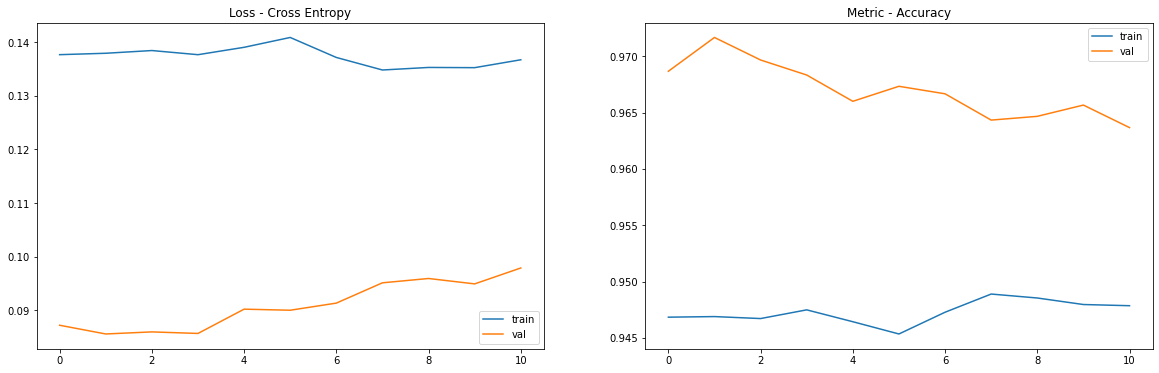

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [12]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.9636666774749756 0.09790080986420313


In [13]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [14]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 7 ... 2 4 7]


# Armo CSV para submitear

In [15]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')